# Clustering & Prediction

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as mp

%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge

In [2]:
data = pd.read_csv("/analytic_data2022.csv")

/var/folders/pz/nfkr52_935n_qw_rs5j5lbl40000gn/T/ipykernel_78779/204465727.py:1: DtypeWarning: Columns (0,1,2,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,25

In [3]:
data.describe(include = 'all').transpose()

count  unique                top   freq
State FIPS Code        3195      54                 48    255
County FIPS Code       3195     488                  3     33
5-digit FIPS Code      3195    3195           fipscode      1
State Abbreviation     3195      53                 TX    255
Name                   3195    1929  Washington County     30
...                     ...     ...                ...    ...
% rural raw value    3188.0  2465.0                1.0  501.0
% rural numerator      3187    3097                  0     26
% rural denominator    3187    3155              21720      3
% rural CI low            1       1         v058_cilow      1
% rural CI high           1       1        v058_cihigh      1

[725 rows x 4 columns]

In [4]:
#Removing the first row from dataset
data = data.iloc[1:]
rawvalue_cols = data.filter(like='raw value')
rawvalue_cols.head()

Premature death raw value Poor or fair health raw value  \
1              7281.9355638                  0.1710516277   
2              10350.071456                  0.2141018928   
3              8027.3947267                         0.201   
4              8118.3582061                         0.172   
5              12876.760319                         0.311   

  Poor physical health days raw value Poor mental health days raw value  \
1                        3.9073588699                      4.5269811321   
2                        4.8146328442                      5.6183155052   
3                        4.5100424038                      5.4190677155   
4                         4.168866136                       5.173915124   
5                        5.8844146337                      6.1098993294   

  Low birthweight raw value Adult smoking raw value Adult obesity raw value  \
1              0.0819065527            0.1649255685                   0.321   
2              0.1043276003              0.21092716                   0.363   
3              0.0973815192                   0.197                   0.353   
4              0.0838573118                   0.199                   0.296   
5              0.1191467222                   0.278                   0.404   

  Food environment index raw value Physical inactivity raw value  \
1                              7.8                         0.259   
2                              5.3                         0.308   
3                              6.5                         0.322   
4                              7.4                         0.276   
5                              5.7                         0.416   

  Access to exercise opportunities raw value  ... % 65 and older raw value  \
1                               0.7979299963  ...             0.1689288227   
2                               0.5663706113  ...             0.1776365571   
3                               0.6275860805  ...             0.1617597293   
4                                0.745079966  ...             0.2158212197   
5                                0.498379284  ...             0.2026109236   

  % non-Hispanic Black raw value % American Indian & Alaska Native raw value  \
1                   0.1257339523                                 0.013029429   
2                   0.2649081627                                0.0070906783   
3                   0.2031881735                                0.0047377327   
4                   0.0847889326                                0.0077980871   
5                   0.4780999634                                0.0069949978   

  % Asian raw value % Native Hawaiian/Other Pacific Islander raw value  \
1      0.0607382165                                       0.0025606484   
2      0.0153511142                                        0.001095797   
3      0.0117018434                                       0.0010864725   
4      0.0110298447                                       0.0006629246   
5      0.0045548823                                       0.0020334296   

  % Hispanic raw value % non-Hispanic white raw value  \
1         0.1860875069                    0.597216607   
2         0.0460338366                   0.6513778636   
3         0.0310089946                    0.731659097   
4          0.046339304                   0.8330825559   
5         0.0467282118                    0.452641425   

  % not proficient in English raw value % female raw value % rural raw value  
1                          0.0415967215       0.5075447019      0.1926902892  
2                          0.0101944794       0.5170272184       0.409631829  
3                          0.0069269521       0.5150770327      0.4200216232  
4                          0.0077206791       0.5158905651      0.4227909911  
5                          0.0182746687       0.4718370003       0.677896347  

[5 rows x 86 columns]

array([[<AxesSubplot:title={'center':'Premature death raw value'}>,
        <AxesSubplot:title={'center':'Poor or fair health raw value'}>,
        <AxesSubplot:title={'center':'Poor physical health days raw value'}>,
        <AxesSubplot:title={'center':'Poor mental health days raw value'}>,
        <AxesSubplot:title={'center':'Low birthweight raw value'}>,
        <AxesSubplot:title={'center':'Adult smoking raw value'}>,
        <AxesSubplot:title={'center':'Adult obesity raw value'}>,
        <AxesSubplot:title={'center':'Food environment index raw value'}>,
        <AxesSubplot:title={'center':'Physical inactivity raw value'}>],
       [<AxesSubplot:title={'center':'Access to exercise opportunities raw value'}>,
        <AxesSubplot:title={'center':'Excessive drinking raw value'}>,
        <AxesSubplot:title={'center':'Alcohol-impaired driving deaths raw value'}>,
        <AxesSubplot:title={'center':'Sexually transmitted infections raw value'}>,
        <AxesSubplot:title={'cente

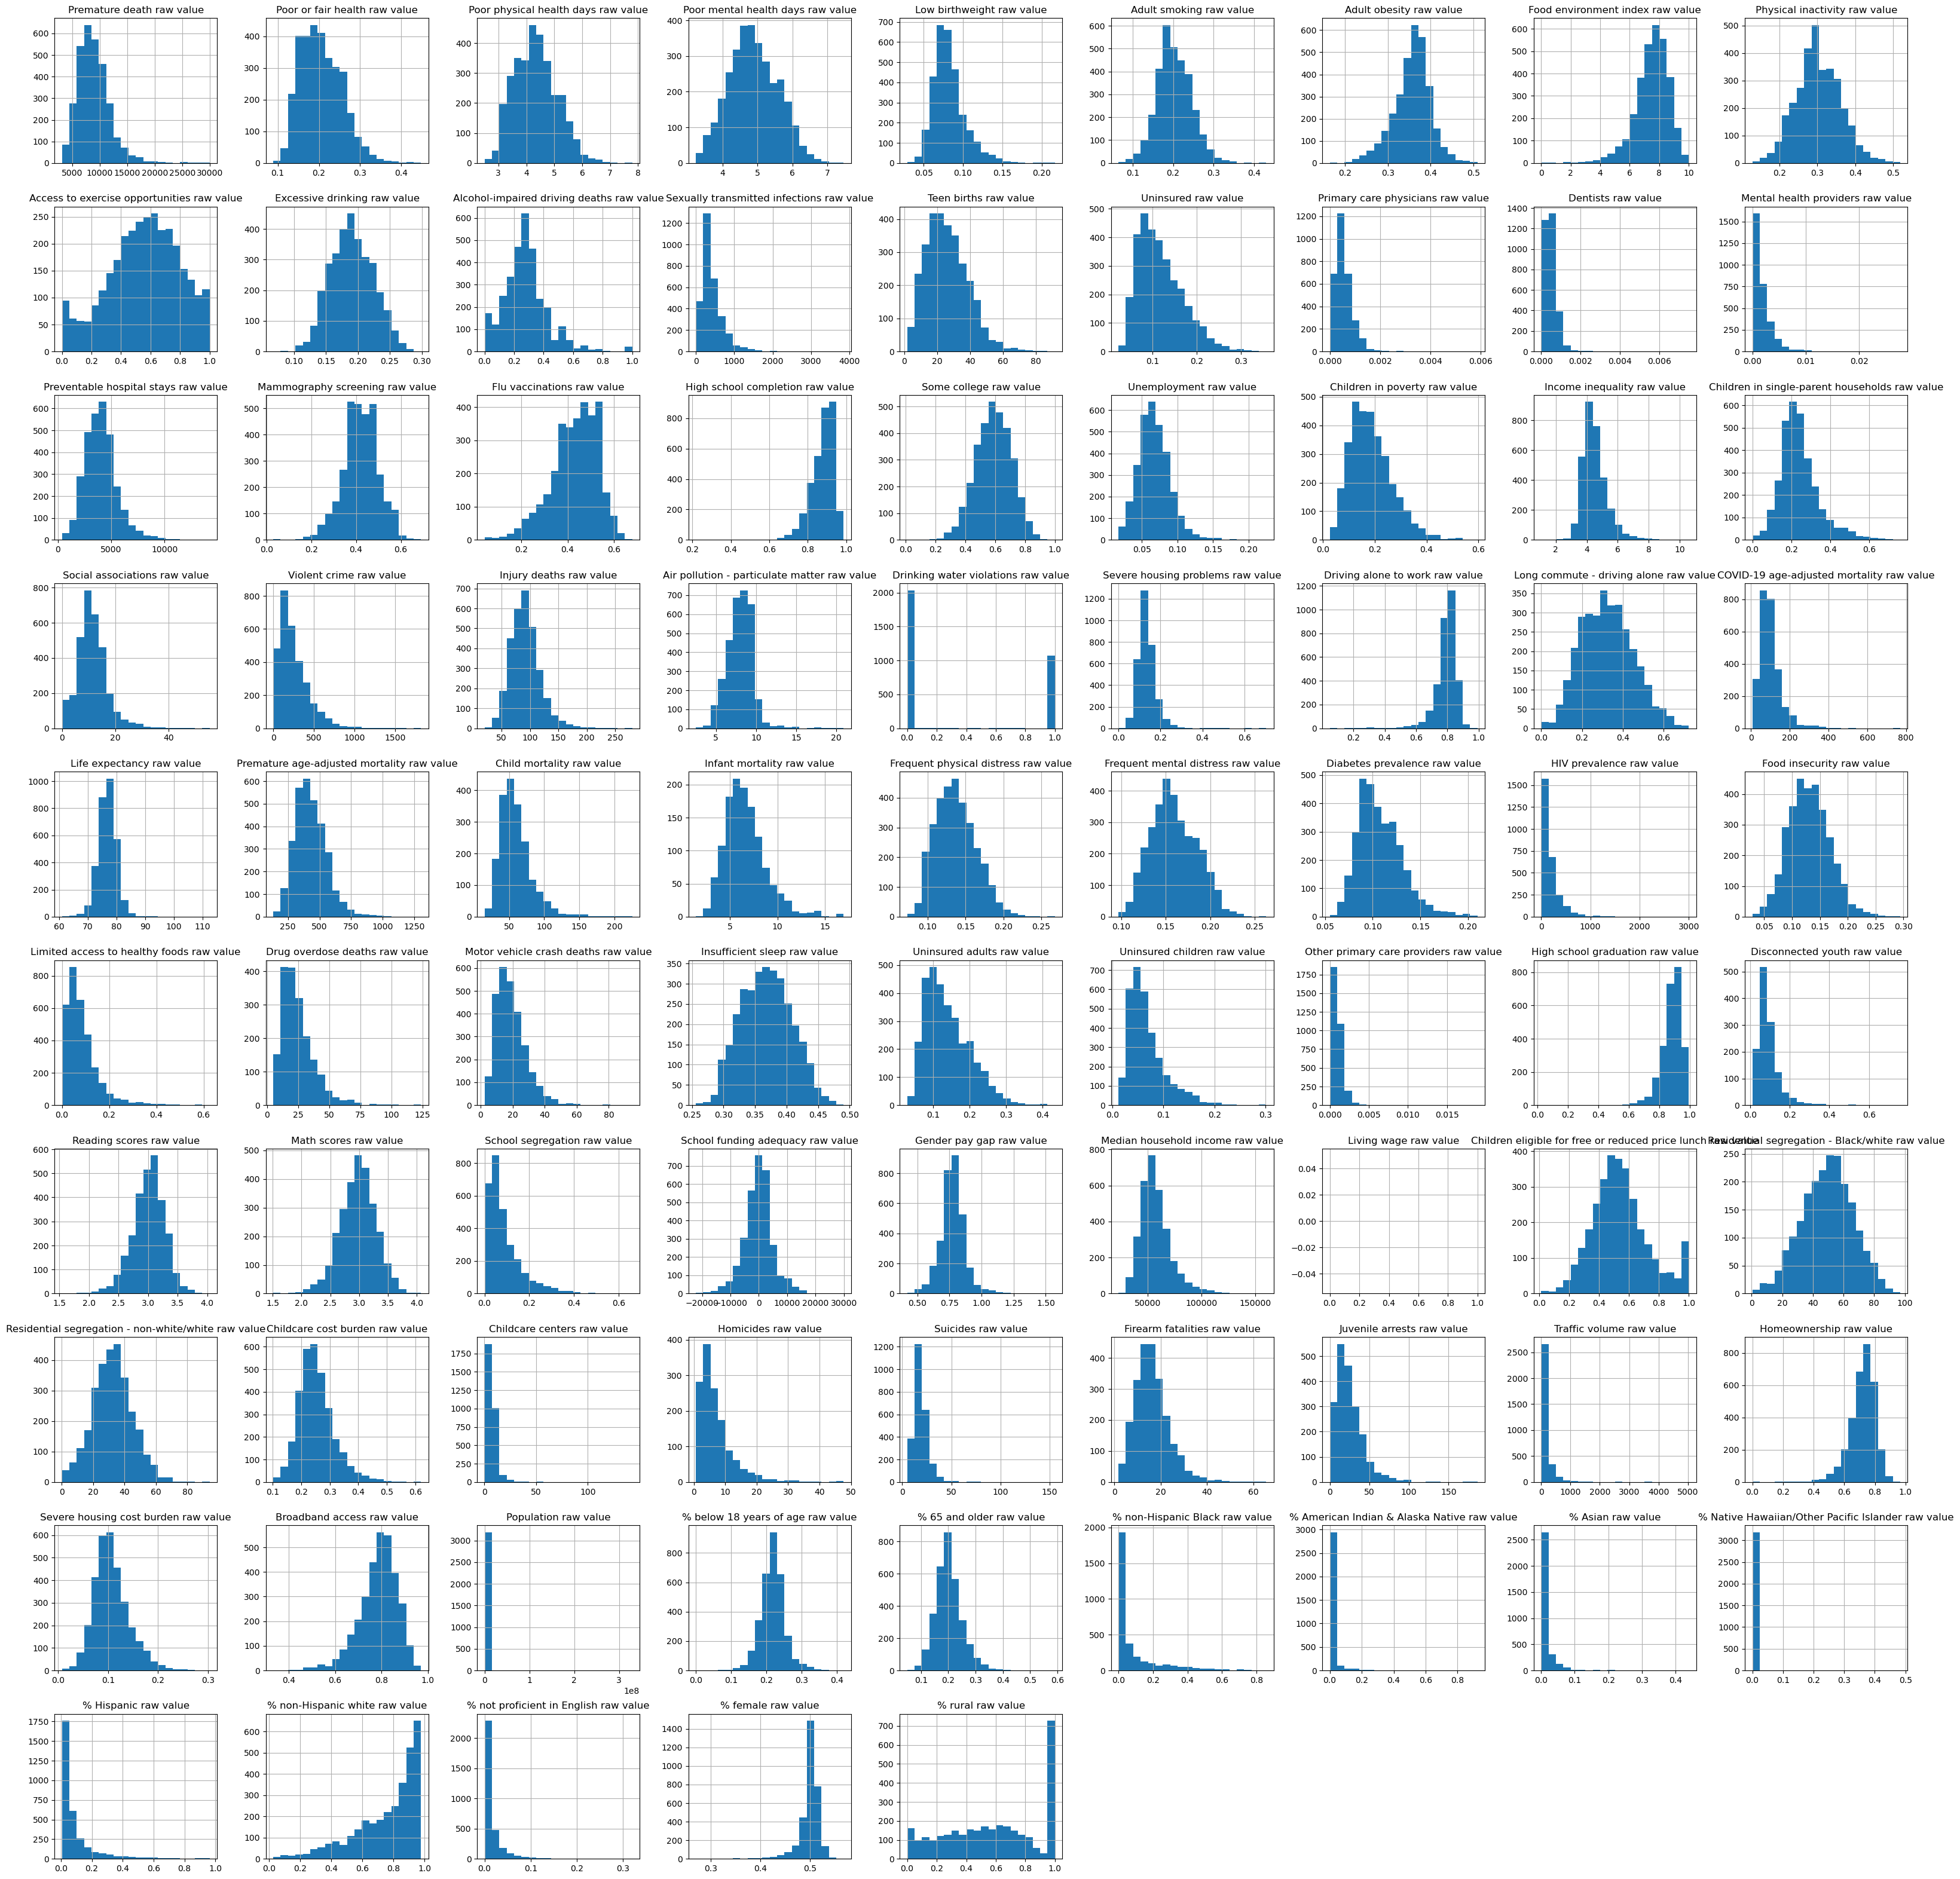

In [5]:
rawvalue_cols = rawvalue_cols.astype('float')
rawvalue_cols.hist(figsize=(40,40), bins=20)

In [6]:
#finding out if there are any outliers
from scipy import stats



z_scores = stats.zscore(rawvalue_cols)

# identify outliers
outliers = rawvalue_cols[(abs(z_scores) > 3).any(axis=1)]

print(len(outliers))

512


In [7]:
corrM = rawvalue_cols.corr()
corrM

Premature death raw value  \
Premature death raw value                               1.000000   
Poor or fair health raw value                           0.696797   
Poor physical health days raw value                     0.711333   
Poor mental health days raw value                       0.638586   
Low birthweight raw value                               0.552839   
...                                                          ...   
% Hispanic raw value                                   -0.092010   
% non-Hispanic white raw value                         -0.298098   
% not proficient in English raw value                  -0.165156   
% female raw value                                      0.118917   
% rural raw value                                       0.239665   

                                       Poor or fair health raw value  \
Premature death raw value                                   0.696797   
Poor or fair health raw value                               1.000000   
Poor physical health days raw value                         0.902704   
Poor mental health days raw value                           0.729709   
Low birthweight raw value                                   0.550288   
...                                                              ...   
% Hispanic raw value                                        0.284402   
% non-Hispanic white raw value                             -0.503492   
% not proficient in English raw value                       0.239881   
% female raw value                                         -0.046420   
% rural raw value                                           0.163953   

                                       Poor physical health days raw value  \
Premature death raw value                                         0.711333   
Poor or fair health raw value                                     0.902704   
Poor physical health days raw value                               1.000000   
Poor mental health days raw value                                 0.913989   
Low birthweight raw value                                         0.493943   
...                                                                    ...   
% Hispanic raw value                                             -0.005479   
% non-Hispanic white raw value                                   -0.228754   
% not proficient in English raw value                            -0.001147   
% female raw value                                                0.011894   
% rural raw value                                                 0.238332   

                                       Poor mental health days raw value  \
Premature death raw value                                       0.638586   
Poor or fair health raw value                                   0.729709   
Poor physical health days raw value                             0.913989   
Poor mental health days raw value                               1.000000   
Low birthweight raw value                                       0.477357   
...                                                                  ...   
% Hispanic raw value                                           -0.261687   
% non-Hispanic white raw value                                  0.003893   
% not proficient in English raw value                          -0.226350   
% female raw value                                              0.135060   
% rural raw value                                               0.250821   

                                       Low birthweight raw value  \
Premature death raw value                               0.552839   
Poor or fair health raw value                           0.550288   
Poor physical health days raw value                     0.493943   
Poor mental health days raw value                       0.477357   
Low birthweight raw value                               1.000000   
...                                                          ...   
% Hispanic raw value           

In [8]:
fig, ax = plt.subplots(figsize=(100, 100))

# plotting correlation heatmap
dataplot = sns.heatmap(rawvalue_cols.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [9]:
#Calculating out number of missing values if any
print(rawvalue_cols.isnull().sum())

Premature death raw value                 60
Poor or fair health raw value              0
Poor physical health days raw value        0
Poor mental health days raw value          0
Low birthweight raw value                106
                                        ... 
% Hispanic raw value                       0
% non-Hispanic white raw value             0
% not proficient in English raw value      0
% female raw value                         0
% rural raw value                          7
Length: 86, dtype: int64


In [10]:
#Replacing the missing values with the mean
rawvalue_cols = rawvalue_cols.fillna(rawvalue_cols.mean())
print(rawvalue_cols.isnull().sum())

Premature death raw value                0
Poor or fair health raw value            0
Poor physical health days raw value      0
Poor mental health days raw value        0
Low birthweight raw value                0
                                        ..
% Hispanic raw value                     0
% non-Hispanic white raw value           0
% not proficient in English raw value    0
% female raw value                       0
% rural raw value                        0
Length: 86, dtype: int64


In [11]:
rawvalue_cols.describe(include = 'all').transpose()

count         mean          std  \
Premature death raw value              3194.0  8891.562734  2902.289815   
Poor or fair health raw value          3194.0     0.205681     0.050162   
Poor physical health days raw value    3194.0     4.334505     0.750069   
Poor mental health days raw value      3194.0     4.883518     0.690966   
Low birthweight raw value              3194.0     0.082138     0.019953   
...                                       ...          ...          ...   
% Hispanic raw value                   3194.0     0.099759     0.138707   
% non-Hispanic white raw value         3194.0     0.753839     0.202360   
% not proficient in English raw value  3194.0     0.016378     0.026790   
% female raw value                     3194.0     0.499087     0.022235   
% rural raw value                      3194.0     0.580467     0.315207   

                                               min          25%          50%  \
Premature death raw value              3090.426825  6892.247228  8593.873182   
Poor or fair health raw value             0.089000     0.166000     0.200000   
Poor physical health days raw value       2.501610     3.749233     4.303930   
Poor mental health days raw value         3.235874     4.395399     4.843651   
Low birthweight raw value                 0.028871     0.068609     0.080376   
...                                            ...          ...          ...   
% Hispanic raw value                      0.006095     0.025803     0.046734   
% non-Hispanic white raw value            0.026996     0.635016     0.826085   
% not proficient in English raw value     0.000000     0.002633     0.007301   
% female raw value                        0.270365     0.494127     0.502865   
% rural raw value                         0.000000     0.326001     0.587246   

                                                75%           max  
Premature death raw value              10450.727906  30007.870277  
Poor or fair health raw value              0.241000      0.448000  
Poor physical health days raw value        4.824688      7.795640  
Poor mental health days raw value          5.379262      7.460286  
Low birthweight raw value                  0.090909      0.216981  
...                                             ...           ...  
% Hispanic raw value                       0.104481      0.963278  
% non-Hispanic white raw value             0.918303      0.976411  
% not proficient in English raw value      0.017923      0.320473  
% female raw value                         0.510135      0.568224  
% rural raw value                          0.858900      1.000000  

[86 rows x 8 columns]

As it can be seen that I have performed following steps for exploratory data analysis:
1. Summary Statistics of the data
2. Finding Outliers using Z-score
3. Histograms for analysing the data
4. Correlation matrix and Heatmap of the data
5. Handling the missing data by replacing the values with the mean

In [12]:
#Selecting only the ranked measures and ranked outcomes for clustering
health_factors = rawvalue_cols[['Adult smoking raw value', 'Adult obesity raw value', 'Food environment index raw value', 'Physical inactivity raw value', 'Access to exercise opportunities raw value', 'Excessive drinking raw value', 'Alcohol-impaired driving deaths raw value', 'Sexually transmitted infections raw value', 'Teen births raw value', 'Uninsured raw value', 'Primary care physicians raw value', 'Dentists raw value', 'Mental health providers raw value', 'Preventable hospital stays raw value', 'Mammography screening raw value', 'Flu vaccinations raw value', 'High school completion raw value', 'Some college raw value', 'Unemployment raw value', 'Children in poverty raw value', 'Income inequality raw value', 'Children in single-parent households raw value', 'Social associations raw value', 'Violent crime raw value', 'Injury deaths raw value', 'Air pollution - particulate matter raw value', 'Drinking water violations raw value', 'Severe housing problems raw value', 'Driving alone to work raw value', 'Long commute - driving alone raw value', 'Premature death raw value', 'Poor or fair health raw value', 'Poor physical health days raw value', 'Poor mental health days raw value', 'Low birthweight raw value']]
health_factors.describe().transpose()

count         mean  \
Adult smoking raw value                         3194.0     0.203085   
Adult obesity raw value                         3194.0     0.356662   
Food environment index raw value                3194.0     7.446346   
Physical inactivity raw value                   3194.0     0.302821   
Access to exercise opportunities raw value      3194.0     0.554825   
Excessive drinking raw value                    3194.0     0.190809   
Alcohol-impaired driving deaths raw value       3194.0     0.275082   
Sexually transmitted infections raw value       3194.0   420.029324   
Teen births raw value                           3194.0    26.042726   
Uninsured raw value                             3194.0     0.119116   
Primary care physicians raw value               3194.0     0.000549   
Dentists raw value                              3194.0     0.000478   
Mental health providers raw value               3194.0     0.001832   
Preventable hospital stays raw value            3194.0  4037.616046   
Mammography screening raw value                 3194.0     0.420076   
Flu vaccinations raw value                      3194.0     0.430025   
High school completion raw value                3194.0     0.876414   
Some college raw value                          3194.0     0.589065   
Unemployment raw value                          3194.0     0.067538   
Children in poverty raw value                   3194.0     0.186287   
Income inequality raw value                     3194.0     4.509087   
Children in single-parent households raw value  3194.0     0.241787   
Social associations raw value                   3194.0    11.442287   
Violent crime raw value                         3194.0   254.119759   
Injury deaths raw value                         3194.0    91.921864   
Air pollution - particulate matter raw value    3194.0     8.010294   
Drinking water violations raw value             3194.0     0.345199   
Severe housing problems raw value               3194.0     0.134066   
Driving alone to work raw value                 3194.0     0.791419   
Long commute - driving alone raw value          3194.0     0.323819   
Premature death raw value                       3194.0  8891.562734   
Poor or fair health raw value                   3194.0     0.205681   
Poor physical health days raw value             3194.0     4.334505   
Poor mental health days raw value               3194.0     4.883518   
Low birthweight raw value                       3194.0     0.082138   

                                                        std          min  \
Adult smoking raw value                            0.042102     0.065000   
Adult obesity raw value                            0.043272     0.164000   
Food environment index raw value                   1.142700     0.000000   
Physical inactivity raw value                      0.058288     0.129000   
Access to exercise opportunities raw value         0.235357     0.000000   
Excessive drinking raw value                       0.033506     0.067417   
Alcohol-impaired driving deaths raw value          0.149819     0.000000   
Sexually transmitted infections raw value        286.071555     0.000000   
Teen births raw value                             12.312918     1.796157   
Uninsured raw value                                0.051035     0.023549   
Primary care physicians raw value                  0.000356     0.000000   
Dentists raw value                                 0.000326     0.000000   
Mental health providers raw value                  0.001948     0.000000   
Preventable hospital stays raw value            1529.048137   379.000000   
Mammography screening raw value                    0.078638     0.030000   
Flu vaccinations raw value                         0.099903     0.040000   
High school completion raw value                   0.060070     0.218519   
Some college raw value                             0.118622     0.011111   
Unemployment raw value                          

In [13]:
#Standard Scaler to standardize our data
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(health_factors)

In [14]:
#Standardizing the data using PCA
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [15]:
#Figuring out how much variance is explained by each of 36 individual components
pca.explained_variance_ratio_

array([0.3364391 , 0.10286703, 0.06114066, 0.05237681, 0.04323982,
       0.03359978, 0.02957005, 0.02746098, 0.02344634, 0.02299525,
       0.0222485 , 0.02049653, 0.0193578 , 0.01856296, 0.01735209,
       0.01654302, 0.01617203, 0.01512766, 0.01370481, 0.01255503,
       0.011758  , 0.01047174, 0.01027302, 0.0098621 , 0.00860707,
       0.00749876, 0.00733421, 0.00662652, 0.005371  , 0.00480094,
       0.00434516, 0.00388193, 0.00213653, 0.00137636, 0.00040039])

Text(0, 0.5, 'Cumulative Explained Variable')

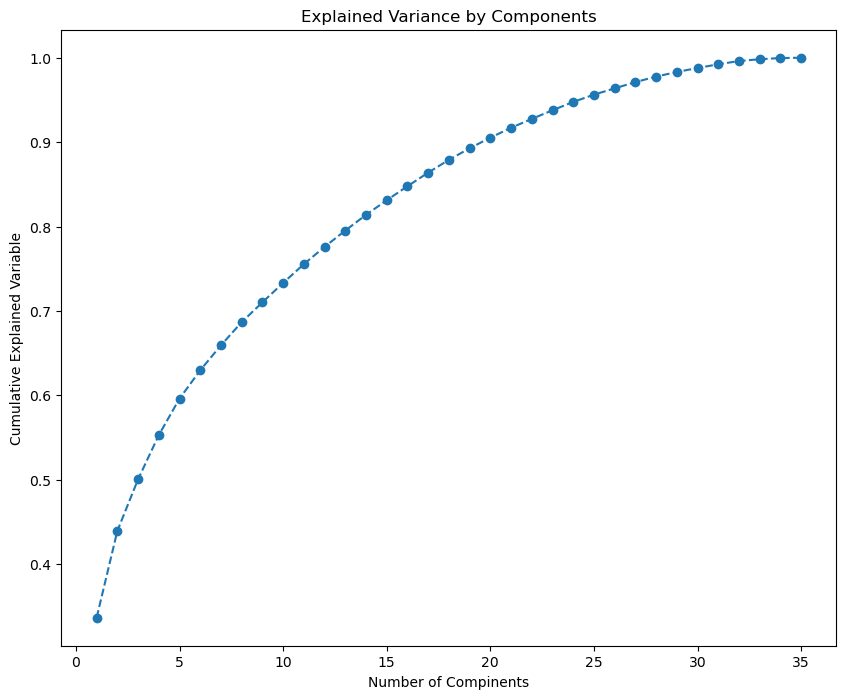

In [16]:
plt.figure(figsize = (10,8))
plt.plot(range(1,36),pca.explained_variance_ratio_.cumsum(),marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Compinents')
plt.ylabel('Cumulative Explained Variable')

In [17]:
#Choose 13 components from the graph by preseerving around 80% of the variance.
pca = PCA(n_components = 13)
#Fit the model with our data with sleected number of components (13)
pca.fit(segmentation_std)

PCA(n_components=13)

In [18]:
pca.transform(segmentation_std)

array([[-1.9009361 ,  2.22382423, -0.22479649, ..., -0.17676963,
        -0.5415741 ,  0.10399679],
       [ 2.12179449,  0.89789259, -1.03773093, ..., -0.08310545,
         0.81394481, -0.72797183],
       [ 0.71910379, -0.14836346, -1.57622416, ..., -0.73144014,
         0.73876393, -0.5025018 ],
       ...,
       [-2.18839711,  0.16521165,  1.58827875, ...,  0.06164754,
        -0.1967901 , -0.80236082],
       [-3.18931207, -0.57156403,  1.93505124, ..., -0.82791309,
        -0.97630159, -0.86039283],
       [-2.53552752, -1.24610646,  3.27210946, ..., -0.15083259,
        -0.19135044, -0.89830971]])

In [19]:
scores_pca = pca.transform(segmentation_std)

In [20]:
#Fitting k means using the tarsnformed data from PCA
wcss = []
for i in range(1,31):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 62)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

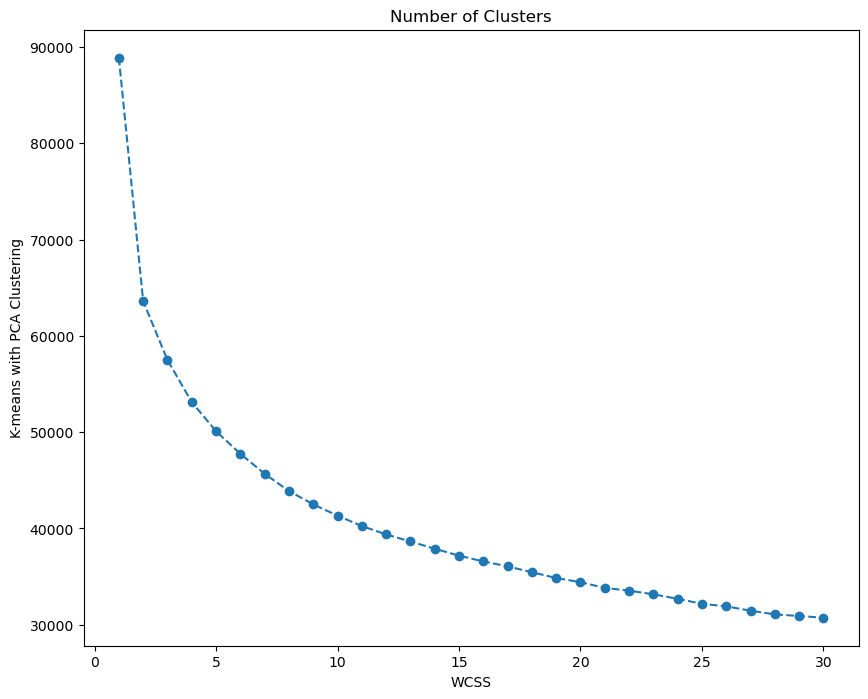

In [21]:
#Plotting WCSS against number of components in graph
plt.figure(figsize = (10,8))
plt.plot(range(1,31),wcss,marker = 'o', linestyle = '--')
plt.title('Number of Clusters')
plt.xlabel('WCSS')
plt.ylabel('K-means with PCA Clustering')
plt.show()

In [22]:
#We have chosen the number of clusters as 2 using the Elbow method. It is done using a kink/elbow in the WCSS graph.
kmeans_pca = KMeans(n_clusters = 2, init = 'k-means++', random_state = 62)

#Fitting the data with k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=2, random_state=62)

In [23]:
#Create a new data frame with the original features and add the PCA scores and assigned clusters.
df_seg_pca_kmeans = pd.concat([health_factors.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_seg_pca_kmeans.columns.values[-13: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4', 'Component 5', 'Component 6', 'Component 7', 'Component 8', 'Component 9', 'Component 10', 'Component 11', 'Component 12', 'Component 13']
df_seg_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_
df_seg_pca_kmeans.head()

Adult smoking raw value  Adult obesity raw value  \
0                 0.164926                    0.321   
1                 0.210927                    0.363   
2                 0.197000                    0.353   
3                 0.199000                    0.296   
4                 0.278000                    0.404   

   Food environment index raw value  Physical inactivity raw value  \
0                               7.8                          0.259   
1                               5.3                          0.308   
2                               6.5                          0.322   
3                               7.4                          0.276   
4                               5.7                          0.416   

   Access to exercise opportunities raw value  Excessive drinking raw value  \
0                                    0.797930                      0.197875   
1                                    0.566371                      0.147992   
2                                    0.627586                      0.161612   
3                                    0.745080                      0.215035   
4                                    0.498379                      0.139276   

   Alcohol-impaired driving deaths raw value  \
0                                   0.265551   
1                                   0.258870   
2                                   0.321429   
3                                   0.322034   
4                                   0.375000   

   Sexually transmitted infections raw value  Teen births raw value  \
0                                      551.0              19.300573   
1                                      636.9              27.598889   
2                                      578.1              22.976946   
3                                      336.0              23.734320   
4                                      895.2              34.700315   

   Uninsured raw value  ...  Component 5  Component 6  Component 7  \
0             0.108405  ...     0.003437    -0.548984    -0.244188   
1             0.115995  ...    -0.520279    -0.494635    -0.819082   
2             0.093512  ...    -0.446857    -0.829210    -0.268236   
3             0.109068  ...     0.414962    -0.454276    -0.627794   
4             0.129915  ...    -0.299680    -1.515730     0.455214   

   Component 8  Component 9  Component 10  Component 11  Component 12  \
0    -0.038959     0.149851     -0.033611     -0.176770     -0.541574   
1    -0.428530     0.239007     -0.594385     -0.083105      0.813945   
2     0.274010     0.563848     -0.685088     -0.731440      0.738764   
3     0.198650    -0.312872     -0.765084     -0.218325     -0.504177   
4     1.227277     0.528000     -1.116881      0.902307     -0.311843   

   Component 13  Segment K-means PCA  
0      0.103997                    0  
1     -0.727972                    1  
2     -0.502502                    1  
3     -0.167692                    0  
4     -0.350922                    1  

[5 rows x 49 columns]

In [24]:
l = df_seg_pca_kmeans['Segment K-means PCA']
health_factors['target'] = l
health_factors.head()

/var/folders/pz/nfkr52_935n_qw_rs5j5lbl40000gn/T/ipykernel_78779/727612858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  health_factors['target'] = l


Adult smoking raw value  Adult obesity raw value  \
1                 0.164926                    0.321   
2                 0.210927                    0.363   
3                 0.197000                    0.353   
4                 0.199000                    0.296   
5                 0.278000                    0.404   

   Food environment index raw value  Physical inactivity raw value  \
1                               7.8                          0.259   
2                               5.3                          0.308   
3                               6.5                          0.322   
4                               7.4                          0.276   
5                               5.7                          0.416   

   Access to exercise opportunities raw value  Excessive drinking raw value  \
1                                    0.797930                      0.197875   
2                                    0.566371                      0.147992   
3                                    0.627586                      0.161612   
4                                    0.745080                      0.215035   
5                                    0.498379                      0.139276   

   Alcohol-impaired driving deaths raw value  \
1                                   0.265551   
2                                   0.258870   
3                                   0.321429   
4                                   0.322034   
5                                   0.375000   

   Sexually transmitted infections raw value  Teen births raw value  \
1                                      551.0              19.300573   
2                                      636.9              27.598889   
3                                      578.1              22.976946   
4                                      336.0              23.734320   
5                                      895.2              34.700315   

   Uninsured raw value  ...  Drinking water violations raw value  \
1             0.108405  ...                             0.404545   
2             0.115995  ...                             0.134328   
3             0.093512  ...                             0.000000   
4             0.109068  ...                             0.000000   
5             0.129915  ...                             0.000000   

   Severe housing problems raw value  Driving alone to work raw value  \
1                           0.173139                         0.749209   
2                           0.136859                         0.848731   
3                           0.147289                         0.867089   
4                           0.124205                         0.829966   
5                           0.154600                         0.840327   

   Long commute - driving alone raw value  Premature death raw value  \
1                                   0.366                7281.935564   
2                                   0.352               10350.071456   
3                                   0.405                8027.394727   
4                                   0.379                8118.358206   
5                                   0.368               12876.760319   

   Poor or fair health raw value  Poor physical health days raw value  \
1                       0.171052                             3.907359   
2                       0.214102                             4.814633   
3                       0.201000                             4.510042   
4                       0.172000                             4.168866   
5                       0.311000                             5.884415   

   Poor mental health days raw value  Low birthweight raw value  target  
1                           4.526981                   0.081907     1.0  
2                           5.618316                   0.104328     1.0  
3                           5.419068                   0.097382     0.0  
4                           5.173915        

/Users/siddhesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


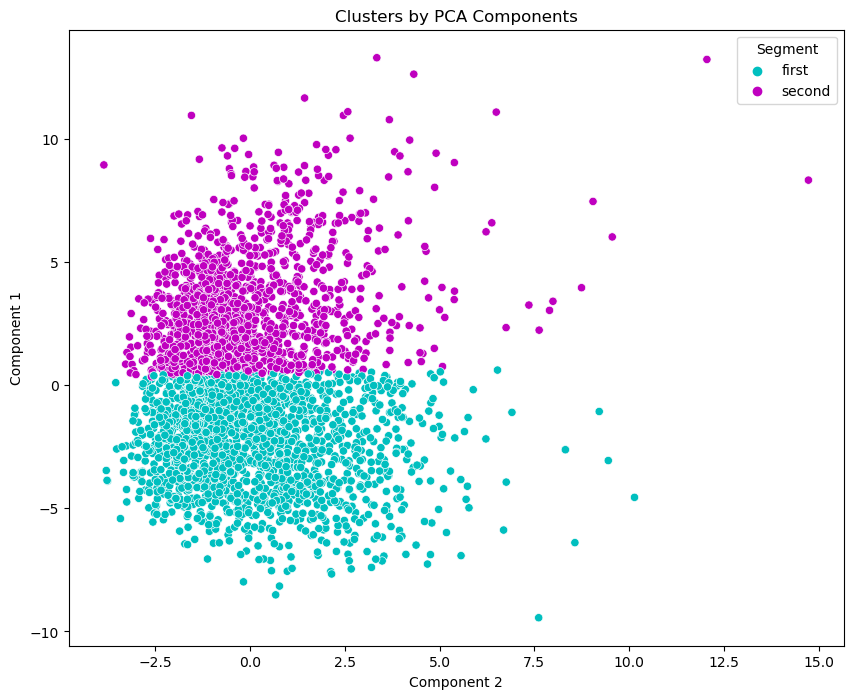

In [25]:
df_seg_pca_kmeans['Segment'] = df_seg_pca_kmeans['Segment K-means PCA'].map({0:'first',1:'second'})
x_axis = df_seg_pca_kmeans['Component 2']
y_axis = df_seg_pca_kmeans['Component 1']
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_seg_pca_kmeans['Segment'],palette = ['c','m'])
plt.title('Clusters by PCA Components')
plt.show()

/Users/siddhesh/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


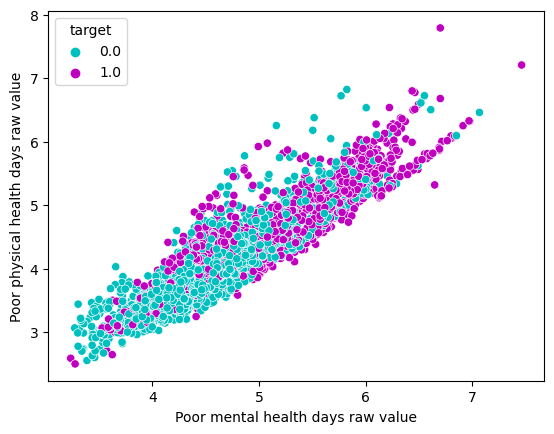

In [26]:
#Scatterplot of physical health and mental health using the clusters
y_axis = health_factors['Poor physical health days raw value']
x_axis = health_factors['Poor mental health days raw value']
sns.scatterplot(x_axis, y_axis,hue = health_factors['target'],palette = ['c','m'])
plt.show()

It can be seen that there is a noteworthy grouping of counties that have similar health outcomes and behaviours. One group of county has more number of poor mental health and physical health days and one group of county has less number of poor mental and physical health days.

In [27]:
#Dropping the health outcomes features and making data ready for regression
health_factors = health_factors.drop(['Premature death raw value', 'Poor or fair health raw value', 'Poor physical health days raw value', 'Poor mental health days raw value', 'Low birthweight raw value', 'target'], axis = 1)
X = health_factors
y = rawvalue_cols['Premature death raw value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Split data into training and testing sets

In [28]:
# Train model 1 using Linear Regression
model1 = LinearRegression()
rfe_model1 = RFE(model1, n_features_to_select=5)
rfe_model1.fit(X_train, y_train)

selected_features = X_train.columns[rfe_model1.support_]
print('Top 5 features:', selected_features)

Top 5 features: Index(['Adult smoking raw value', 'Primary care physicians raw value',
       'Dentists raw value', 'Mental health providers raw value',
       'Children in poverty raw value'],
      dtype='object')


In [29]:
# create a Ridge regression object
model2 = Ridge(alpha=1.0)

rfe_model2 = RFE(model2, n_features_to_select=5)
rfe_model2.fit(X_train, y_train)

selected_features = X_train.columns[rfe_model2.support_]
print('Top 5 features:', selected_features)

Top 5 features: Index(['Adult smoking raw value', 'Adult obesity raw value',
       'Excessive drinking raw value', 'Children in poverty raw value',
       'Children in single-parent households raw value'],
      dtype='object')


Feature: 0, Score: 9736
Feature: 1, Score: 3205
Feature: 2, Score: 14
Feature: 3, Score: 2369
Feature: 4, Score: 57
Feature: 5, Score: -5096
Feature: 6, Score: 243
Feature: 7, Score: 1
Feature: 8, Score: 32
Feature: 9, Score: 662
Feature: 10, Score: -248408
Feature: 11, Score: -14192
Feature: 12, Score: 211
Feature: 13, Score: 0
Feature: 14, Score: -1998
Feature: 15, Score: 419
Feature: 16, Score: 1722
Feature: 17, Score: 1837
Feature: 18, Score: -1662
Feature: 19, Score: 6170
Feature: 20, Score: 74
Feature: 21, Score: 2668
Feature: 22, Score: -6
Feature: 23, Score: 0
Feature: 24, Score: 46
Feature: 25, Score: 27
Feature: 26, Score: -176
Feature: 27, Score: -86
Feature: 28, Score: 2371
Feature: 29, Score: 614


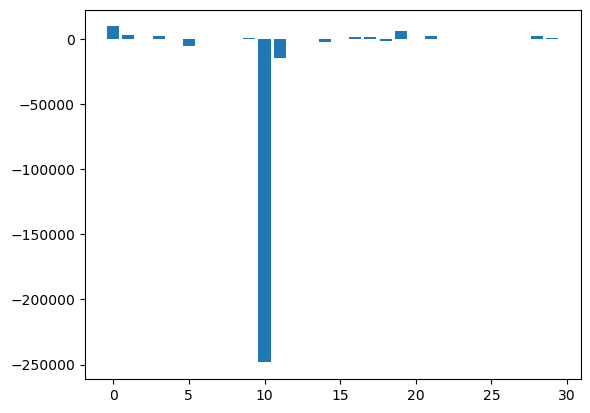

In [30]:
model1.fit(X_train, y_train)
# get importance
importance1 = model1.coef_
# summarize feature importance
for i,v in enumerate(importance1):
 print('Feature: %0d, Score: %0d' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance1))], importance1)
pyplot.show()

Feature: 0, Score: 138490
Feature: 1, Score: 66279
Feature: 2, Score: 29
Feature: 3, Score: 55489
Feature: 4, Score: 488
Feature: 5, Score: 95892
Feature: 6, Score: 1727
Feature: 7, Score: 0
Feature: 8, Score: 3
Feature: 9, Score: 1312
Feature: 10, Score: 162715
Feature: 11, Score: 70468
Feature: 12, Score: 48835
Feature: 13, Score: 0
Feature: 14, Score: 20220
Feature: 15, Score: 3681
Feature: 16, Score: 19203
Feature: 17, Score: 9823
Feature: 18, Score: 24110
Feature: 19, Score: 67321
Feature: 20, Score: 97
Feature: 21, Score: 24792
Feature: 22, Score: 1
Feature: 23, Score: 0
Feature: 24, Score: 1
Feature: 25, Score: 17
Feature: 26, Score: 423
Feature: 27, Score: 9627
Feature: 28, Score: 32122
Feature: 29, Score: 6566


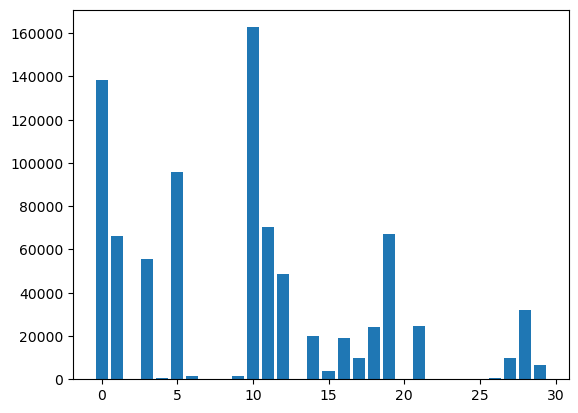

In [31]:
model2.fit(X_train, y_train)

# Calculate the standardized coefficients
coef = model2.coef_ / np.std(X_train, axis=0)

# Calculate the feature importance scores
importance2 = np.abs(coef)

# summarize feature importance
for i,v in enumerate(importance2):
 print('Feature: %0d, Score: %0d' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()


Thus the five most important factors predicting premature death using model 1 (Linear regression) are Adult smoking, Primary care physicians, Dentists, Mental health providers, Children in poverty raw value.

The five most important factors predicting premature death using model 2 (Ridge Regression) are Adult smoking, Adult obesity, Excessive drinking, Children in poverty, Children in single-parent households.

In [32]:
# Make predictions on the testing data
y_pred_model1 = model1.predict(X_test)

mse_model1 = mean_squared_error(y_test, y_pred_model1)
rmse_model1 = np.sqrt(mse_model1)
mae_model1 = mean_absolute_error(y_test, y_pred_model1)
r2_model1 = r2_score(y_test, y_pred_model1)

print("For Model 1 using Linear Regression")
print('Mean squared error:', mse_model1)
print('Root mean squared error:', rmse_model1)
print('Mean absolute error:', mae_model1)
print('R-squared:', r2_model1)

For Model 1 using Linear Regression
Mean squared error: 1761176.7217537435
Root mean squared error: 1327.093335735563
Mean absolute error: 907.0318412107782
R-squared: 0.7897069658173791


In [33]:
# Make predictions on the testing data
y_pred_model2 = model2.predict(X_test)

mse_model2 = mean_squared_error(y_test, y_pred_model2)
rmse_model2 = np.sqrt(mse_model2)
mae_model2 = mean_absolute_error(y_test, y_pred_model2)
r2_model2 = r2_score(y_test, y_pred_model2)

print("For Model 1 using Ridge Regression")
print('Mean squared error:', mse_model2)
print('Root mean squared error:', rmse_model2)
print('Mean absolute error:', mae_model2)
print('R-squared:', r2_model2)

For Model 1 using Ridge Regression
Mean squared error: 1780385.4237854204
Root mean squared error: 1334.3108422648077
Mean absolute error: 911.061613450174
R-squared: 0.7874133537209571


It can be seen from teh R-squared error and rest of the factors that Model 1 (Linear Regression) is more accurate. It has lower root mean squared error which means that the forecast values are close to the actual. It has less mean absolute error which signifies that the absolute value of difference between actual and forecast values is less. Model 1 has more R-squared than Model 2 which signifies the goodness of fit.